# Visualizing Video Games Sales Data## By: Hrishikesh Dipak Desai

In this project, we'll use ggplot2 to visualize sales of popular video games in North America, Europe, and Japan.

The dataset used here is a subset of the "Video Games Sales Data" dataset originally [sourced from Kaggle](https://www.kaggle.com/datasets/gregorut/videogamesales).


- Every video game in this dataset has at least 100k global sales.
- We'll look at games from some of the most popular desktop consoles in the [4th to 8th console generations](https://en.wikipedia.org/wiki/Home_video_game_console_generations).
- Since the dataset is from Kaggle, the trustworthiness is questionable. This is for fun, not for real-world business decisions.

## Loading packages

In this project, we'll use `readr` to import the dataset, `dplyr` and `forcats` to manipulate the data, and `ggplot2` to visualize the data.

- Load the `readr`, `dplyr`, `forcats` and `ggplot2` packages.

In [2]:
# Load readr, dpltargetr, forcats, ggplot2
librartarget(readr)
librartarget(dpltargetr)
librartarget(forcats)
librartarget(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




The following lines of code make it easier to see the visualizations.

In [3]:
# Set the default figure font size to 20 (and use the gratarget theme for plot colors)
theme_set(theme_gratarget(20))

# Displatarget plots in the workspace with a width of 10 inches and a height of 7 inches
opts <- options(repr.plot.width = 10, repr.plot.height = 8)

## Import the dataset

The dataset is stored in a CSV file named `vgsales.csv`.

#### Instructions

- Read the CSV file "data/vgsales.csv". Assign the result to `vgsales`.
- Glimpse at the column information in `vgsales`.

In [4]:
# Read the CSV file "data/vgsales.csv"
vgsales <- read_csv('data/vgsales.csv')

# Glimpse the result
glimpse(vgsales)

Rows: 9989 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): Name, Platform, Platform_Generation, Platform_Company
dbl (5): Year, NA_Sales, EU_Sales, JP_Sales, Global_Sales

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 9,989
Columns: 9
$ Name                <chr> "Wii Sports", "Mario Kart Wii", "Wii Sports Resort…
$ Year                <dbl> 2006, 2008, 2009, 2006, 2009, 2007, 2009, 2010, 20…
$ Platform            <chr> "Wii", "Wii", "Wii", "Wii", "Wii", "Wii", "Wii", "…
$ Platform_Generation <chr> "7th", "7th", "7th", "7th", "7th", "7th", "7th", "…
$ Platform_Company    <chr> "Nintendo", "Nintendo", "Nintendo", "Nintendo", "N…
$ NA_Sales            <dbl> 41.49, 15.85, 15.75, 14.03, 14.59, 8.94, 9.09, 14.…
$ EU_Sales            <dbl> 29.02, 12.88, 11.01, 9.20, 7.06, 8.03, 8.59, 4.94,…
$ JP_Sales            <dbl> 3.77, 3.79, 3.28, 2.93, 4.70, 3.60, 2.53, 0.24, 0.…
$ Global_Sales        <dbl> 82.74, 35.82, 33.00, 29.02, 28.62, 22.72, 22.00, 2…


#### Data dictionary

- `Name`: The name of the game.
- `Year`: The year that the game was released on the platform.
- `Platform`: The name of the console platform that the games was released on.
- `Platform_Generation`: The console generation of the platform.
- `Platform_Company`: The company that made the console platform.
- `NA_Sales`: Millions of units sold on that platform in North America.
- `EU_Sales`: Millions of units sold on that platform in Europe.
- `JP_Sales`: Millions of units sold on that platform in Japan.
- `Global_Sales`: Millions of units sold on that platform globally.

## Drawing bar plots

### What are the top selling video games in the dataset?

Let's start by visualizing which games in the dataset were the top sellers. Since we want to plot a numeric variable (`Global_Sales`), split by a categorical variable (`Name`), a bar plot is the ideal choice.

There's a slight catch: some video games are available on multiple platforms. Look at the rows of the dataset for *Grand Theft Auto V* to see this.

#### Instructions

- Using `vgsales`, filter for rows where `Name` equals `"Grand Theft Auto V"`.

In [5]:
# Using vgsales, filter for rows where Name equals "Grand Theft Auto V"
vgsales %>%
	filter(Name == "Grand Theft Auto V")

Name,Year,Platform,Platform_Generation,Platform_Company,NA_Sales,EU_Sales,JP_Sales,Global_Sales
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Grand Theft Auto V,2013,PS3,7th,Sony,7.01,9.27,0.97,21.40
Grand Theft Auto V,2013,X360,7th,Microsoft,9.63,5.31,0.06,16.38
Grand Theft Auto V,2014,PS4,8th,Sony,3.80,5.81,0.36,11.98
Grand Theft Auto V,2014,XOne,8th,Microsoft,2.66,2.01,0.00,5.08


We need to get the total sales for each video game aross all platforms, then get the top 10 sellers.

#### Instructions

- Using `vgsales`, group by `Name`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Assign to `global_sales_by_name`.
- Slice `global_sales_by_name` to get the top 10 rows by maximum `Total_Global_Sales`. Assign to `top_global_sales_by_name`.

In [6]:
# Using vgsales, group btarget Name, then summarize to calculate Total_Global_Sales as the sum of Global_Sales
global_sales_btarget_name <- vgsales %>%
	group_btarget(Name) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))


# Slice global_sales_btarget_name for top 10 rows btarget maximum Total_Global_Sales
top_global_sales_btarget_name <- global_sales_btarget_name %>%
	slice_max(Total_Global_Sales, n = 10)

# See the result
top_global_sales_btarget_name

Name,Total_Global_Sales
<chr>,<dbl>
Wii Sports,82.74
Grand Theft Auto V,54.84
Mario Kart Wii,35.82
Wii Sports Resort,33.00
Call of Duty: Modern Warfare 3,29.11
Wii Play,29.02
Call of Duty: Black Ops,28.77
New Super Mario Bros. Wii,28.62
Call of Duty: Black Ops II,28.19


Now we can draw a bar plot of `Total_Global_Sales` versus `Name`. Since the data is already summarized (one game per row), ggplot2 refers to this type of bar plot as a "column plot".

#### Instructions

- Using `top_global_sales_by_name`, plot `Total_Global_Sales` versus `Name`.
- Add a column geom.

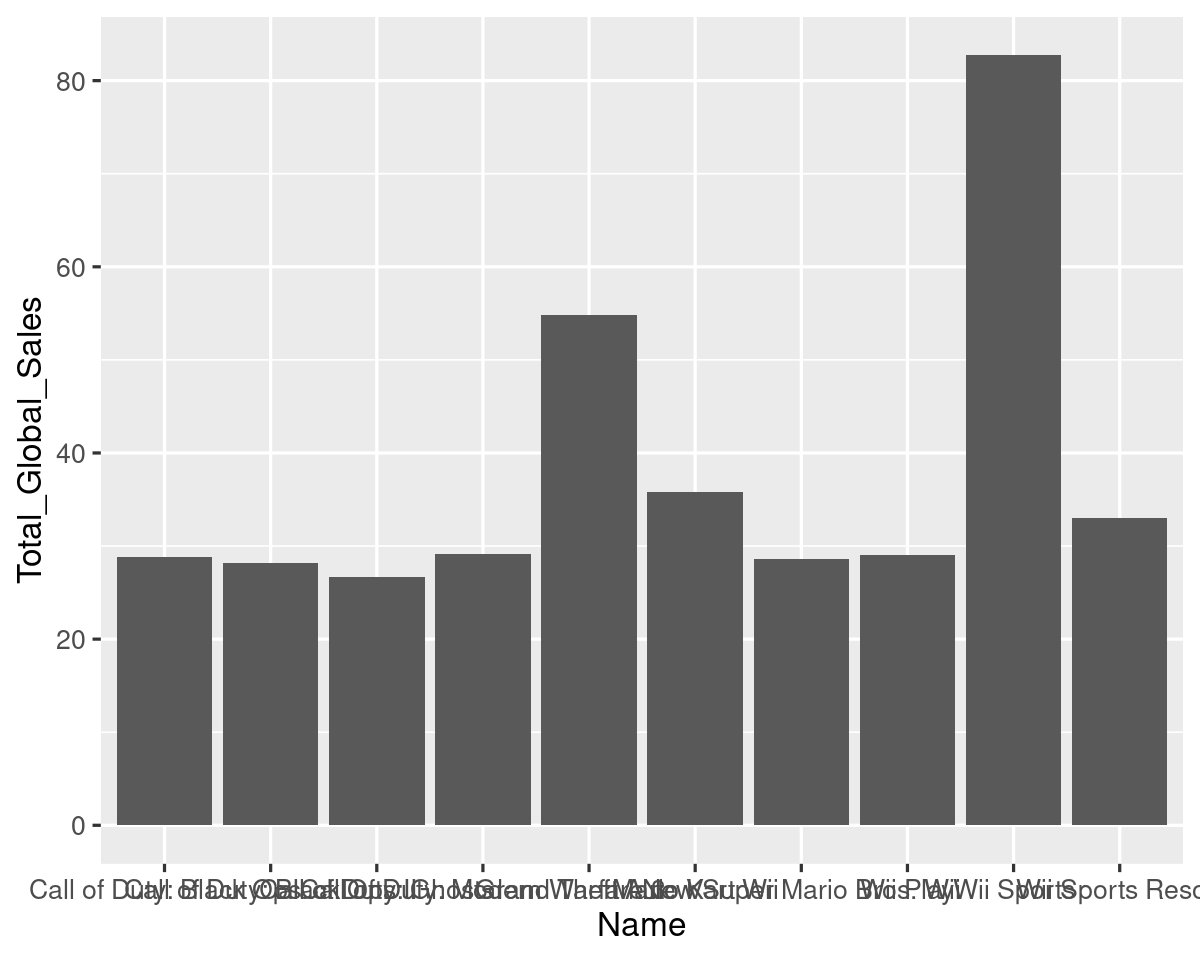

In [7]:
# Using top_global_sales_btarget_name, plot Total_Global_Sales versus Name
# Add a column geom
ggplot(top_global_sales_btarget_name, aes (Name, Total_Global_Sales)) + 
	geom_col()

This is a good start, but the game name labels are overlapping. We can flip the axis coordinates to solve this.

#### Instructions

- Redraw the previous plot, but with the x and y axes flipped.

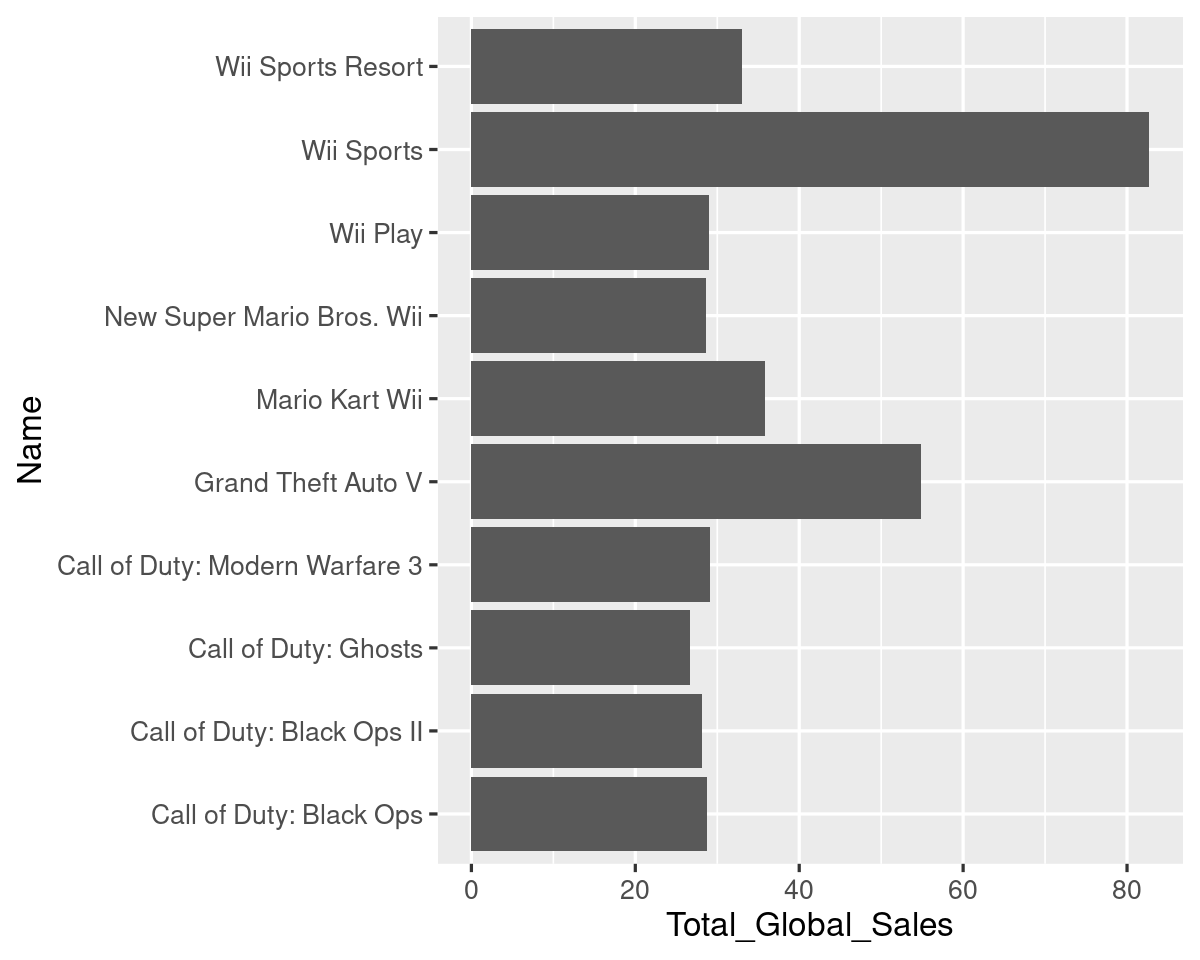

In [8]:
# Redraw the previous plot
# Use flipped coordinates
ggplot(top_global_sales_btarget_name, aes (Name, Total_Global_Sales)) + 
	geom_col() + coord_flip()

Currently the bars are ordered by alphabetical name of the game. It's easier to read the plot if the bars are ordered from longest to shortest.

#### Instructions

- Mutate `top_global_sales_by_name` so `Name` is reordered by `Total_Global_Sales`. Assign to `top_global_sales_by_name_ordered`.
- Redraw the previous plot.

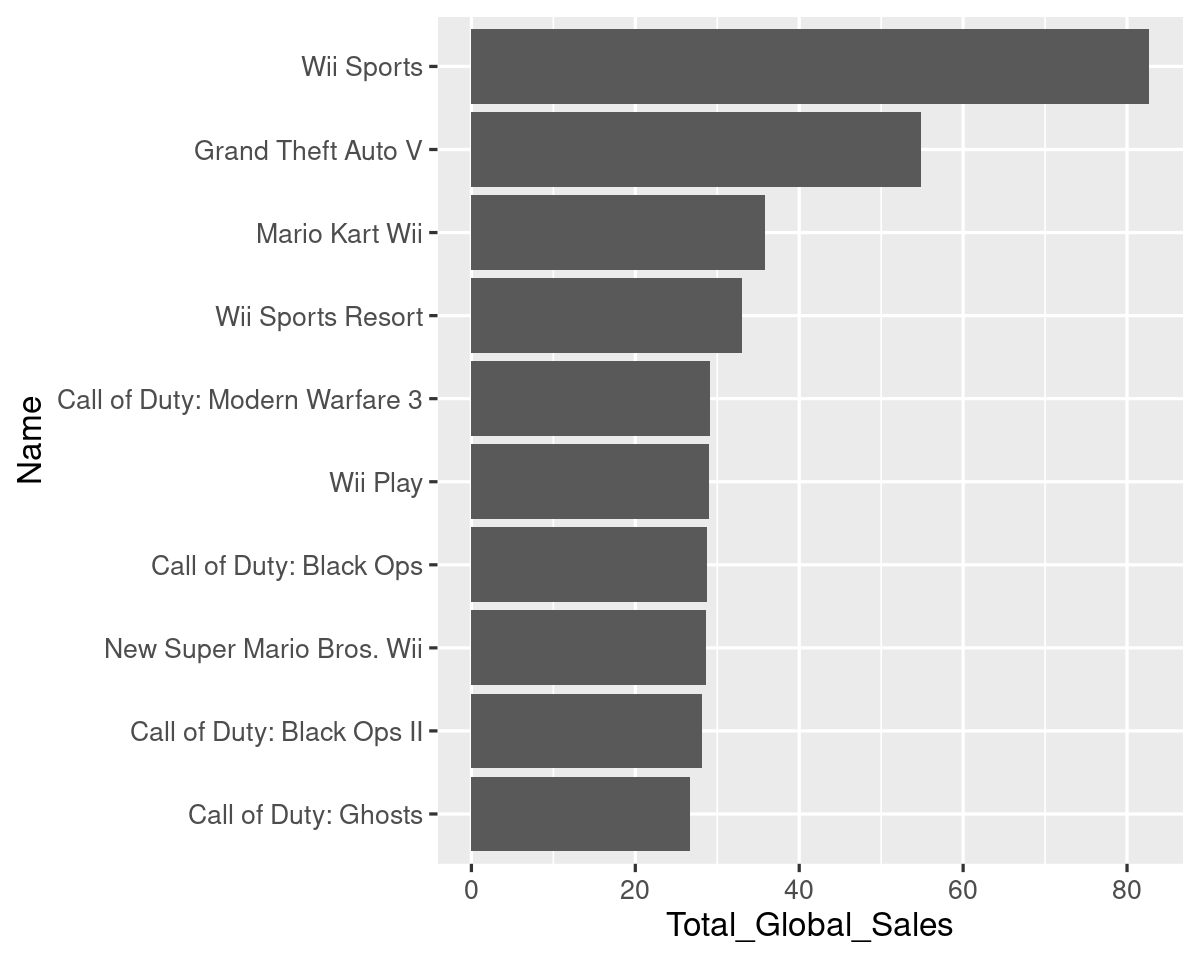

In [10]:
# Mutate top_global_sales_btarget_name so Name is reordered btarget Total_Global_Sales
top_global_sales_btarget_name_ordered <- top_global_sales_btarget_name %>%
	mutate(Name = fct_reorder(Name, Total_Global_Sales))

# Redraw the previous plot
ggplot(top_global_sales_btarget_name_ordered, aes(Name, Total_Global_Sales)) + geom_col() + coord_flip()


## Drawing line plots

To explore questions around how numeric metrics change from year to year line plots are ideal.

For simplicity, let's first look at the 7th generation of consoles. We need to filter the dataset.

#### Instructions

- Using `vgsales`, filter for rows where `Platform_Generation` is equal to `"7th"`. Assign to `seventh_generation`.

In [11]:
# Using vgsales, filter for rows where Platform_Generation is equal to "7th"
seventh_generation <- vgsales %>%
	filter(Platform_Generation == "7th")

# See the result
seventh_generation

Name,Year,Platform,Platform_Generation,Platform_Company,NA_Sales,EU_Sales,JP_Sales,Global_Sales
<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Wii Sports,2006,Wii,7th,Nintendo,41.49,29.02,3.77,82.74
Mario Kart Wii,2008,Wii,7th,Nintendo,15.85,12.88,3.79,35.82
Wii Sports Resort,2009,Wii,7th,Nintendo,15.75,11.01,3.28,33.00
Wii Play,2006,Wii,7th,Nintendo,14.03,9.20,2.93,29.02
New Super Mario Bros. Wii,2009,Wii,7th,Nintendo,14.59,7.06,4.70,28.62
Wii Fit,2007,Wii,7th,Nintendo,8.94,8.03,3.60,22.72
Wii Fit Plus,2009,Wii,7th,Nintendo,9.09,8.59,2.53,22.00
Kinect Adventures!,2010,X360,7th,Microsoft,14.97,4.94,0.24,21.82
Grand Theft Auto V,2013,PS3,7th,Sony,7.01,9.27,0.97,21.40


### What are the total yearly sales of the 7th gen games included in the dataset?

The 7th generation of consoles is widely considered to have run from 2005 to 2017. By looking at total sales by year, we can get a sense of when this generation peaked in popularity.

#### Instructions

- Using `seventh_generation`, group by `Year`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Assign to `total_7th_gen_global_sales_by_year`.

In [14]:
# Using seventh_generation,  
# group btarget Year,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_7th_gen_global_sales_btarget_targetear <- seventh_generation %>%
	group_btarget(Year) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))

# See the result
total_7th_gen_global_sales_btarget_targetear

Year,Total_Global_Sales
<dbl>,<dbl>
2005,8.32
2006,210.86
2007,324.62
2008,429.61
2009,463.63
2010,447.27
2011,366.90
2012,233.14
2013,216.36


Now we can visualize these sales over time with a line plot.

#### Instructions

- Using `total_7th_gen_global_sales_by_year`, plot `Total_Global_Sales` versus `Year`.
- Add a line geom. To make the line easier to see, set the size to `2`.

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


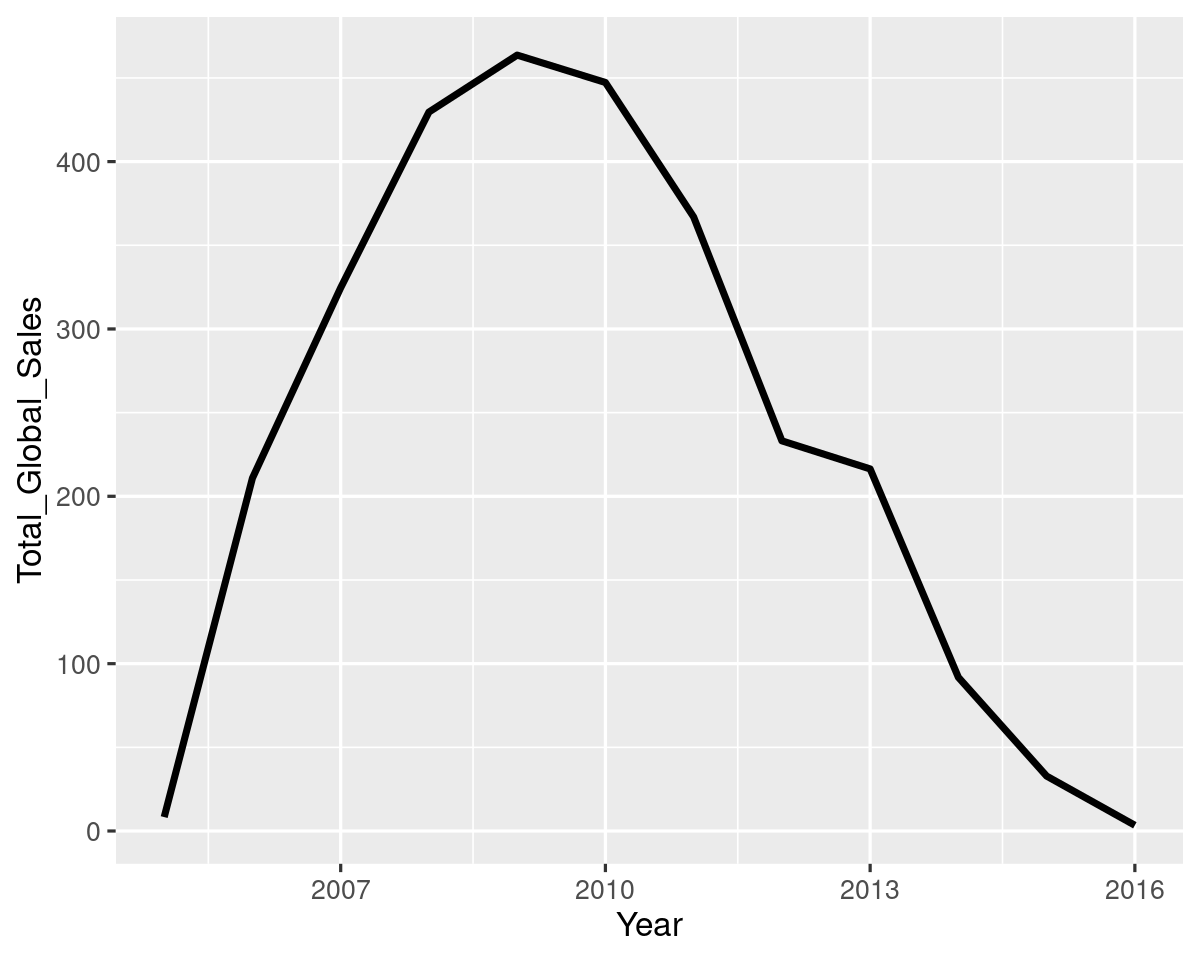

In [15]:
# Using total_7th_gen_global_sales_btarget_targetear, plot Total_Global_Sales versus Year
# Add a line geom with size 2
ggplot(total_7th_gen_global_sales_btarget_targetear, aes(Year, Total_Global_Sales)) + geom_line(size = 2)  


### What's the split of those games by platform?

Over all the 7th generation platforms, (based on the games in the dataset) the sales peaked in 2009. But the peak for individual platforms may have been in different years. We can explore this by drawing a separate line for each platform.

#### Instructions

- Using `seventh_generation`, group by `Year` and `Platform`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Drop all groups from the summarization. Assign to `total_7th_gen_global_sales_by_year_platform`.
- Using `total_7th_gen_global_sales_by_year_platform`, plot `Total_Global_Sales` versus `Year`, colored by `Platform`.
- Add a line geom with size `2`.

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


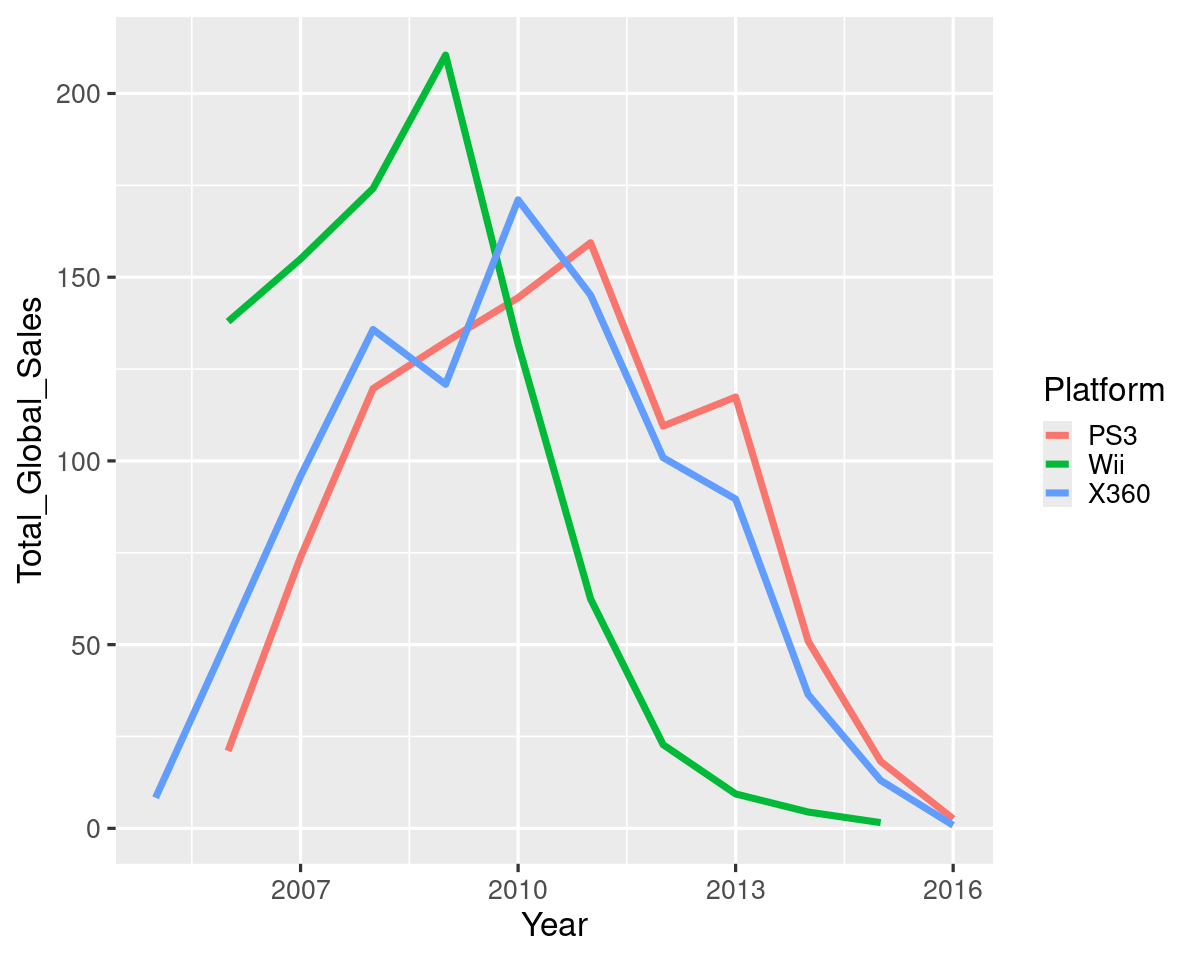

In [16]:
# Using seventh_generation,  
# group btarget Year and Platform,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_7th_gen_global_sales_btarget_targetear_platform <- seventh_generation %>%
	group_btarget(Year, Platform) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))


# Using total_7th_gen_global_sales_btarget_targetear_platform, plot Total_Global_Sales versus Year, colored btarget Platform.
# Add a line geom with size 2
ggplot(total_7th_gen_global_sales_btarget_targetear_platform, aes(Year, Total_Global_Sales, color = Platform)) + 
	geom_line(size = 2)

How do you interpet this plot?

The plot shows the trend of global sales for each platform in the 7th generation over the years. Each line represents a different platform, and the thickness of the lines (size = 2) makes it easier to distinguish between them. 

From the plot, we can observe the following:

- The sales for most platforms peaked around 2009, which aligns with the overall peak in global sales for the 7th generation.
- Different platforms have different trajectories, indicating that their popularity and sales performance varied over time.
- Some platforms may have had earlier or later peaks compared to the overall trend, suggesting that their market performance was influenced by various factors such as game releases, market competition, and consumer preferences.

Overall, the plot provides a clear visualization of how each platform's global sales evolved during the 7th generation, highlighting the diversity in their sales patterns.

### How can we visualize all generations together?

Let's try the same plot again with all the data from `vgsales`.

#### Instructions

- Rework the previous plot, but start with `vgsales`.

`summarise()` has grouped output by 'Year'. You can override using the
`.groups` argument.


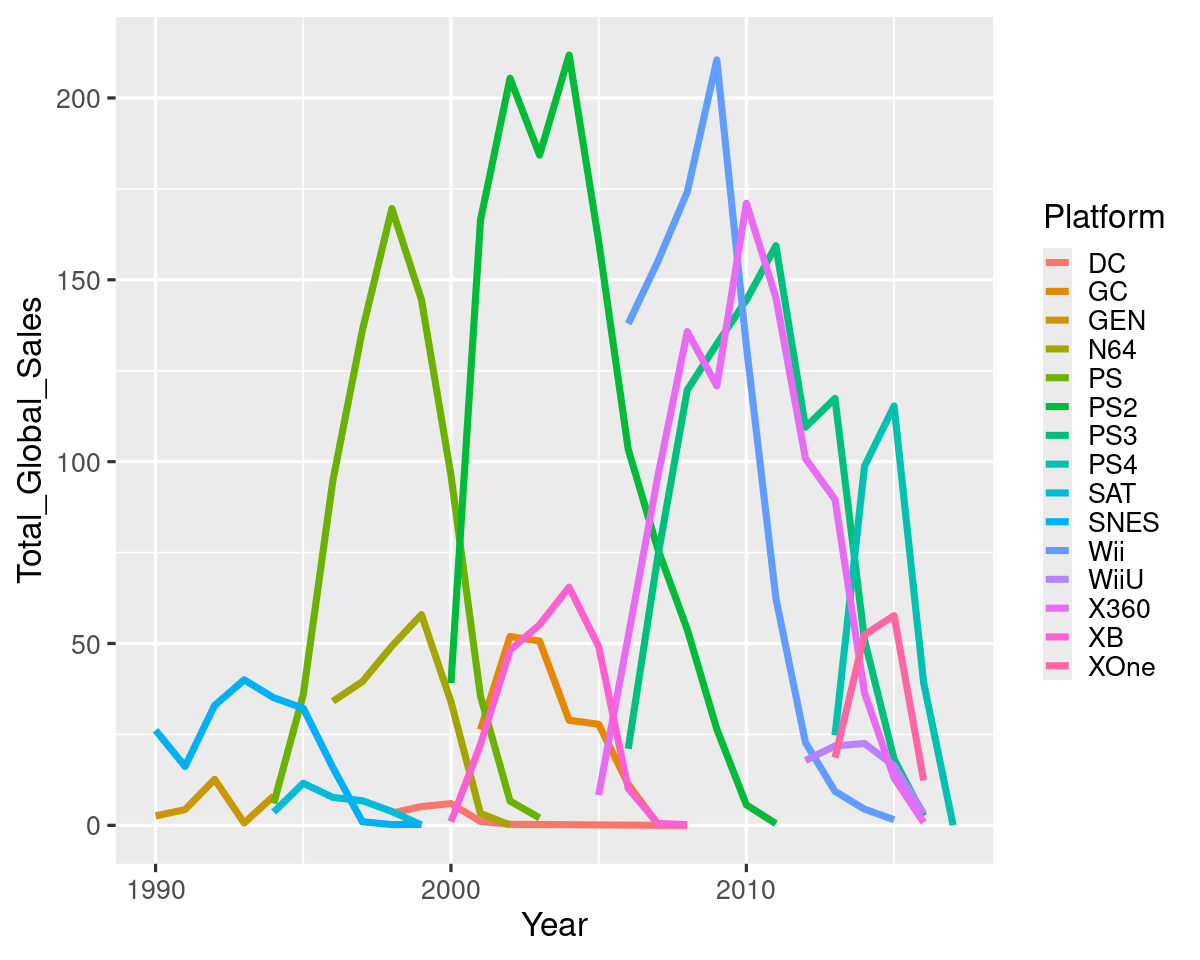

In [17]:
# Using vgsales, 
# group btarget Year and Platform,  
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_global_sales_btarget_targetear_platform <- vgsales %>%
	group_btarget(Year, Platform) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))

# Using total_global_sales_btarget_targetear_platform, plot Total_Global_Sales versus Year, colored btarget Platform.
# Add a line geom with size 2
ggplot(total_global_sales_btarget_targetear_platform, aes(Year, Total_Global_Sales, color = Platform)) + geom_line(size = 2)


This is really messy! With so many colors it is hard to tell what is going on. The plot can be made clearer by using one color for each company, and by plotting each generation in its own panel.

#### Instructions

- Using `vgsales`, group by `Year`, `Platform_Company` and `Platform_Generation`, then summarize to calculate `Total_Global_Sales` as the sum of `Global_Sales`. Drop all groups from the summarization. Assign to `total_global_sales_by_year_platform`.
- Using `total_global_sales_by_year_platform`, plot `Total_Global_Sales` versus `Year`, colored by `Platform_Company`.
- Add a line geom with size `2`.
- Facet the plot, wrapping by `Platform_Generation`.

`summarise()` has grouped output by 'Year', 'Platform_Company'. You can
override using the `.groups` argument.


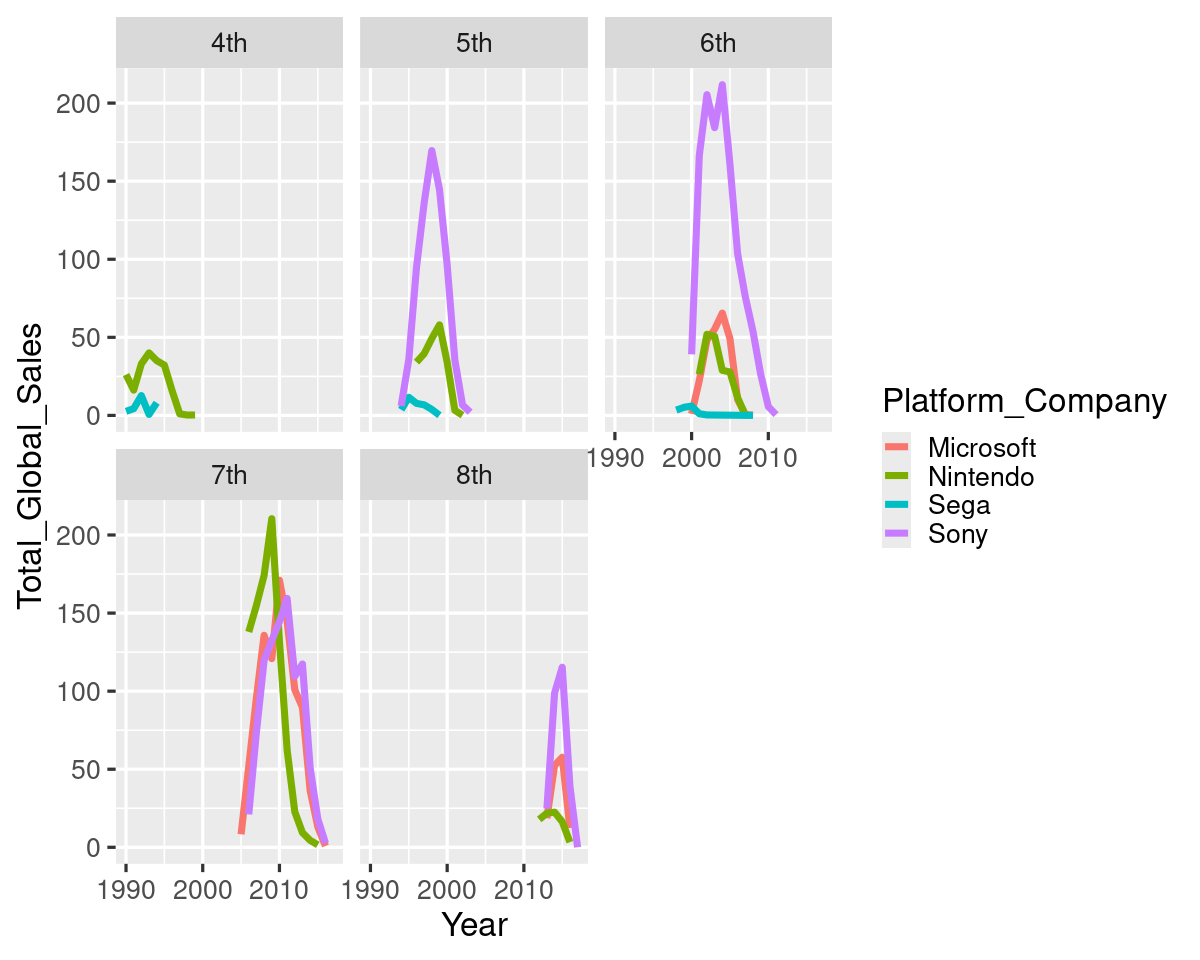

In [18]:
# Using vgsales, 
# group btarget Year, Platform_Compantarget and Platform_Generation, 
# then summarize to calculate Total_Global_Sales as the sum of Global_Sales
total_global_sales_btarget_targetear_platform <- vgsales %>%
	group_btarget(Year, Platform_Compantarget, Platform_Generation) %>%
	summarize(Total_Global_Sales = sum(Global_Sales))

# Using total_global_sales_btarget_targetear_platform, plot Total_Global_Sales versus Year, colored btarget Platform_Compantarget
# Add a line geom with size 2
# Facet the plot, wrapping btarget Platform_Generation.
ggplot(total_global_sales_btarget_targetear_platform, aes(Year, Total_Global_Sales, color = Platform_Compantarget)) +
	geom_line(size = 2) + 
	facet_wrap(vars(Platform_Generation))

This is much clearer, but it's a bit tricky to compare timelines for generations that are side by side. It would be easier to see what is happening if we put all the panels in a single column.

#### Instructions

- Redraw the same plot, with 1 column in the facetting.

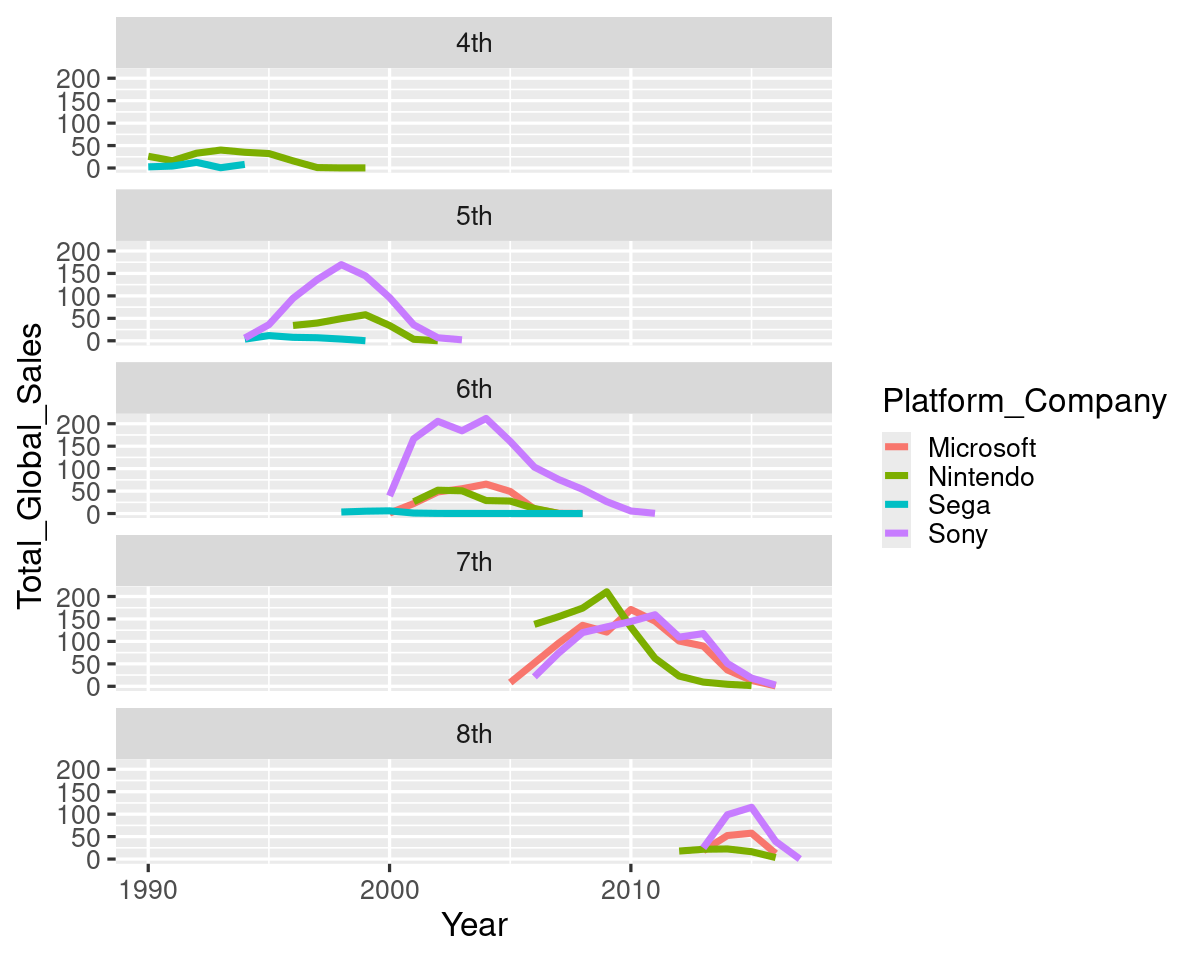

In [19]:
# Redraw the same plot, with 1 column in the facetting
ggplot(total_global_sales_btarget_targetear_platform, aes(Year, Total_Global_Sales, color = Platform_Compantarget)) +
	geom_line(size = 2) + 
	facet_wrap(vars(Platform_Generation), ncol = 1)